<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./05_CAMS_European_air_quality_forecast_dust_concentration_load_browse.ipynb"><< 05 - CAMS European Air Quality Forecast - Dust </a>

<hr>

# Metop-A/B GOME-2 - Tropospheric NO<sub>2</sub> - Level 3

Metop-A/B GOME-2 data records are monthly aggregated products (Level 3), regridded onto a regular latitude longitude grid. Data records are disseminated in the data format `netCDF`. 

Data records are processed for three parameters:

* `tropospheric ozone column`, 
* `total and tropospheric nitrogen dioxide column`, and 
* `total water vapour column`.

This notebook guides you through how the data can be loaded and gives basic plotting examples.

#### Module outline:
* [1 - Load and browse Metop-A/B GOME-2 data records](#load_l3)
* [2 - Plotting example of Metop-A/B GOME-2 Level 3 data](#plotting)
* [3 - Analyse the annual NO<sub>2</sub> cycle of three cities in the mediterranean region](#timeseries)

<hr>

##### Load required libraries

In [1]:
import os
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import pandas as pd
import datetime

# Python libraries for visualisation
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

##### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

## <a id="load_l3"></a>Load and browse Metop-A/B GOME-2 data records (Level 3)

[xarray](http://xarray.pydata.org/en/stable/) is a Python library that makes it easy to load and browse data who are disseminated in the `NetCDF` format.

### Open NetCDF files with `xarray`

#### Open one individual file with `xarray`

By using xarray's `open_dataset()` function, one individual `netCDF` file can be loaded to create a new `xarray.Dataset`. Let us load a Level 3 data file for Nitrogen Dioxide for January 2017 and let us inspect the resulting `xarray.Dataset` and the `latitude` and `longitude` coordinates.

In [ ]:
ds = xr.open_dataset('../eodata/gome2/level3/no2/GOME_NO2_Global_201701_METOPB_DLR_v1.nc')
ds, ds.latitude, ds.longitude

<br>

You see that the `data variable` section of the loaded `xarray.Dataset` is empty. This is due to the internal structure of the Metop-A/B GOME-2 Level 3 data. The data is organised in groups within the `netCDF` file. To load from a group, you have to pass the `group='PRODUCT'` as keyword to the `open_dataset()` function. 

If you do this, you can see that the `Dataset` contains six data variables:

* (1) `NO2total`, 
* (2) `NO2total_err`, 
* (3) `NO2total_stddev`, 
* (4) `NO2trop`,
* (5) `NO2trop_err`,
* (6) `NO2trop_stddev`

However, `latitude` and `longitude` do not contain any coordinates.

In [4]:
no2 = xr.open_dataset('../eodata/gome2/level3/no2/GOME_NO2_Global_201701_METOPB_DLR_v1.nc', group='PRODUCT')
no2

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440)
Dimensions without coordinates: latitude, longitude
Data variables:
    NO2total         (latitude, longitude) float32 ...
    NO2total_err     (latitude, longitude) float32 ...
    NO2total_stddev  (latitude, longitude) float32 ...
    NO2trop          (latitude, longitude) float32 ...
    NO2trop_err      (latitude, longitude) float32 ...
    NO2trop_stddev   (latitude, longitude) float32 ...
    nobs             (latitude, longitude) float32 ...

You can use the xarray function `assign_coords` to assign the coordinate values from your dataset to the dimensions of the `no2` data object.

In [5]:
no2_assigned = no2.assign_coords(latitude=ds.latitude, longitude=ds.longitude)
no2_assigned

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440)
Coordinates:
  * latitude         (latitude) float32 -89.875 -89.625 ... 89.625 89.875
  * longitude        (longitude) float32 -179.875 -179.625 ... 179.625 179.875
Data variables:
    NO2total         (latitude, longitude) float32 ...
    NO2total_err     (latitude, longitude) float32 ...
    NO2total_stddev  (latitude, longitude) float32 ...
    NO2trop          (latitude, longitude) float32 ...
    NO2trop_err      (latitude, longitude) float32 ...
    NO2trop_stddev   (latitude, longitude) float32 ...
    nobs             (latitude, longitude) float32 ...

#### Open multiple netCDF files with `xarray`

xarray's `open_mfdataset()` function is very useful to load multiple netCDF files simultaneously. This function automatically concatenates and merges multiple files into a single xarray dataset. The behaviour of `xr.open_mfdataset` is the same as the one of `xr.open_dataset`. In order to access the dataset variables, you have to specify the `group` parameter. 

Additionally, if the dimension you wish to concatenate the individual files on is not defined in the original dataset, a new dimension can be defined by specifying the `concat_dim` key. Let us define `time` as the dimension the files shall be concatenated on.

In [6]:
import os
fileList = glob.glob('../eodata/gome2/level3/no2/*.nc')
fileList.sort()
fileList

['../../eodata/gome2/level3/no2/GOME_NO2_Global_200702_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200703_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200704_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200705_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200706_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200707_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200708_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200709_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200710_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200711_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200712_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200801_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_NO2_Global_200802_METOPA_DLR_v1.nc',
 '../../eodata/gome2/level3/no2/GOME_N

In [7]:
mf_dataset = xr.open_mfdataset(fileList, concat_dim='time', combine='nested',  group='PRODUCT')
mf_dataset


<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440, time: 130)
Dimensions without coordinates: latitude, longitude, time
Data variables:
    NO2total         (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_err     (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_stddev  (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop          (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_err      (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_stddev   (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    nobs             (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>

<br>

The resulting `xarray.Dataset` has three dimensions (`latitude`, `longitude` and `time`). With `assign_coords` you can assign the right coordinate values to the dimensions. You can use again the `ds` xarray.Dataset you defined at the beginning. 

With the help of Python's [pandas](https://pandas.pydata.org/) library, you can create efficiently a list of monthly time values, which can be assigned to the time dimension.

In [8]:
# Build list of time coordinates with pandas
time_coords = pd.date_range('2007-02', '2017-11', freq='MS').strftime("%Y-%m").astype('datetime64[ns]')

# Assign values to Dataset dimension
mf_dataset_assigned = mf_dataset.assign_coords(latitude=ds.latitude, longitude=ds.longitude, time=time_coords)
mf_dataset_assigned

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440, time: 130)
Coordinates:
  * latitude         (latitude) float32 -89.875 -89.625 ... 89.625 89.875
  * longitude        (longitude) float32 -179.875 -179.625 ... 179.625 179.875
  * time             (time) datetime64[ns] 2007-02-01 2007-03-01 ... 2017-11-01
Data variables:
    NO2total         (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_err     (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_stddev  (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop          (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_err      (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_stddev   (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    nobs             (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>

<br>

## <a id="plotting"></a>Plotting example of Metop-A/B GOME-2 Level 3 data

The last step is to visualize one time step of the created data object. Since the data are arranged on a regular grid, you can make use of the `pcolormesh` function of Pyton's plotting library [matplotlib](https://matplotlib.org/).

As before, you can make use of Cartopy's features and create a basemap in a `PlateCarree` projection. You can add coast- and gridlines. The NO<sub>2</sub> values are added as colored data values onto a regular grid with matplotlib's `pcolormesh` function. As you might need to re-use the code for plotting, we define a plotting function called [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh).


Let us say, you want to plot the monthly averaged values of `Tropospheric Nitrogen Dioxide` for month November 2017. Before you can visualize it, you have to select the variable `NO2trop` from the `xarray.Dataset` *mf_dataset_assigned* you defined above.

Further, you can select the month you wish to visualize by selecting the month and year of the time dimension with the `sel()` function of the xarray library.

In [12]:
no2_da = mf_dataset_assigned.NO2trop

no2_timestep = no2_da.sel(time='2017-06')
no2_timestep

<xarray.DataArray 'NO2trop' (time: 1, latitude: 720, longitude: 1440)>
dask.array<getitem, shape=(1, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * longitude  (longitude) float32 -179.875 -179.625 ... 179.625 179.875
  * time       (time) datetime64[ns] 2017-06-01
Attributes:
    long_name:      Tropospheric Column NO2 content
    units:          molec cm-2
    standard_name:  troposphere_mole_content_of_nitrogen_dioxide

Let us define here bounding box information for the Mediterranean basin. We can use those to focus our plot on the Mediterranean region.

In [13]:
lonmin=10.
lonmax=37.
latmin=28.
latmax=48.

The last step is to apply 

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Tropospheric Column NO2 content'}>)

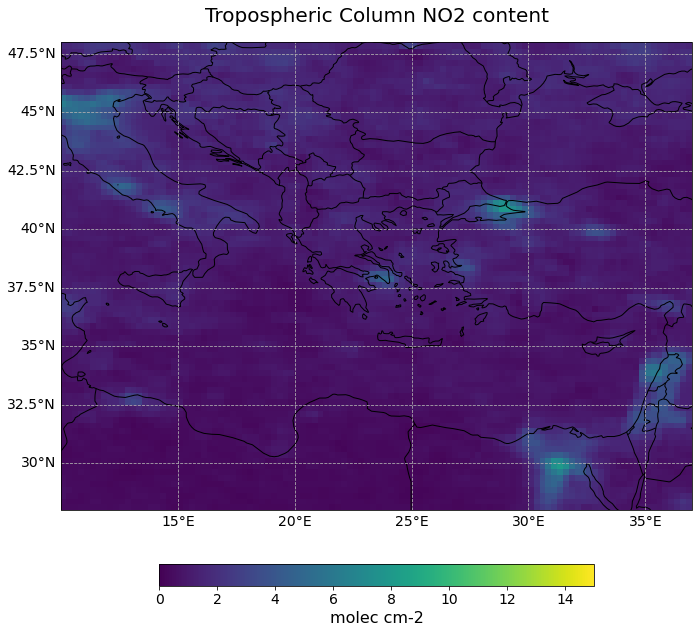

In [14]:
visualize_pcolormesh(data_array=no2_timestep[0,:,:]*1e-15, 
                     longitude=no2_timestep.longitude, 
                     latitude=no2_timestep.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='viridis', 
                     unit=no2_timestep.units, 
                     long_name=no2_timestep.long_name, 
                     vmin=0, 
                     vmax=15, 
                     lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax, 
                     set_global=False)


<br>

## <a id='timeseries'></a>Analyse the annual NO<sub>2</sub> cycle of three cities in the Mediterranean region

Let us have a look at the longterm trends for individual point locations in the Mediterranean region.

xarray's label based selection method `sel` allows to select data based on name or value. `sel` further allows for enabling nearest neighbor, which select the closest latitude or longitude value. xarray offers a simple plotting wrapper of Python's matplotlib. Thus, we can directly apply the `plot` function to a `DataArray` object. We can add additional specifications, e.g. if it shall be a line plot, what color and style the line shall have, etc.


Let's plot the temporal trends for three locations: `Cairo`, `Istanbul` and `Athens`. We specify latitude and longitude coordinates for the three cities and plot the three `xarray.DataArrays` as line plots.

NOTE: the NO<sub>2</sub> values are shown in 1e<sup>-15</sup> molecules per cm<sup>2</sup>.

In [ ]:
fig = plt.figure(figsize=(20,5))

# Latitude / Longitude coordinates for Cairo
city1 = 'Cairo'
lat1 = 30.
lon1 = 31.3

# Latitude / Longitude coordinates for Istanbul
city2 = 'Istanbul'
lat2 = 41.
lon2 = 29.

# Latitude / Longitude coordinates for Athens
city3 = 'Athens'
lat3 = 38.
lon3 = 23.7

conversion_factor = 1e-15

city1_total = no2_da.sel(latitude=lat1, longitude=lon1, method='nearest')*conversion_factor
city1_total.plot.line(color='slategrey', linestyle='dashed', label=city1)

city2_total = no2_da.sel(latitude=lat2, longitude=lon2, method='nearest')*conversion_factor
city2_total.plot.line(linestyle='dashed',color='firebrick', label=city2)

city3_total = no2_da.sel(latitude=lat3, longitude=lon3, method='nearest')*conversion_factor
city3_total.plot.line(linestyle='dashed',color='green', label=city3)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(no2_assigned.NO2trop.long_name + " - 2007-2017", fontsize=20, pad=20)
plt.ylabel(str(conversion_factor) + ' ' + no2_assigned.NO2trop.units, fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.legend(fontsize=16,loc=0)
plt.show()

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./05_CAMS_European_air_quality_forecast_dust_concentration_load_browse.ipynb"><< 05 - CAMS European Air Quality Forecast - Dust </a>

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br>



<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.